In [1]:
import os
os.chdir('../')

import DeepPurpose.CompoundPred as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score

### download data by requesting to the MIT aicures team: https://www.aicures.mit.edu/forum

In [9]:
def run_rdkit_2d_normalized(fold_n, balanced):
    
    train = pd.read_csv('~/Desktop/aicures_data/train_cv/fold_'+str(fold_n)+'/train.csv')
    dev = pd.read_csv('~/Desktop/aicures_data/train_cv/fold_'+str(fold_n)+'/dev.csv')
    test = pd.read_csv('~/Desktop/aicures_data/train_cv/fold_'+str(fold_n)+'/test.csv')
    
    test_output = pd.read_csv('~/Desktop/aicures_data/test.csv')

    if balanced:
        # oversample balanced training
        train = pd.concat([train[train.activity == 1].sample(n = len(train[train.activity == 0]), replace=True), train[train.activity == 0]]).sample(frac = 1).reset_index(drop = True)
    
    X_train = train.smiles.values
    y_train = train.activity.values
    X_dev = dev.smiles.values
    y_dev = dev.activity.values
    X_test = test.smiles.values
    y_test = test.activity.values
    
    X_test_output = test_output.smiles.values
    y_test_output = test_output.activity.values
    
    drug_encoding = 'rdkit_2d_normalized'
    train = data_process(X_drug = X_train, y = y_train, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    val = data_process(X_drug = X_dev, y = y_dev, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)

    test = data_process(X_drug = X_test, y = y_test, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    test_output_ = data_process(X_drug = X_test_output, y = y_test_output, 
                                    drug_encoding = drug_encoding,
                                    split_method='no_split', 
                                    random_seed = 1)
    
    config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 128,
                        )
    
    model = models.model_initialize(**config)
    model.train(train, val, test)
    
    scores = model.predict(test)
    
    test_outputs = model.predict(test_output_)
    
    return roc_auc_score(test.Label.values, scores), average_precision_score(test.Label.values, scores), scores, test.Label.values, test_outputs, model

Drug Property Prediction Mode...
in total: 3330 drugs
encoding drug...
unique drugs: 1694
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 202 drugs
encoding drug...
unique drugs: 202
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 238 drugs
encoding drug...
unique drugs: 238
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69274. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.92325 , AUPRC: 0.78820 , F1: 0.66666
Training at Epoch 2 iteration 0 with loss 0.23882. Total time 0.00027 hour

drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69331. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.67676 , AUPRC: 0.09521 , F1: 0.19047
Training at Epoch 2 iteration 0 with loss 0.17267. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.80934 , AUPRC: 0.13829 , F1: 0.28571
Training at Epoch 3 iteration 0 with loss 0.00816. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.81313 , AUPRC: 0.09637 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00168. Total time 0.00055 hours


/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.79924 , AUPRC: 0.09149 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00439. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.79671 , AUPRC: 0.12293 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00029. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.81439 , AUPRC: 0.12665 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00062. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.81691 , AUPRC: 0.12738 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00085. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.80555 , AUPRC: 0.12527 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00112. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.82702 , AUPRC: 0.12991 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00191. Total time 0.00222 hours
Validation at Epoch 10 , AUROC: 0.75631 , AUPRC: 0.11793 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00016. Total time 0.0025 hours
Vali

Validation at Epoch 8 , AUROC: 0.74747 , AUPRC: 0.40689 , F1: 0.4
Training at Epoch 9 iteration 0 with loss 0.00117. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.74242 , AUPRC: 0.45102 , F1: 0.30769
Training at Epoch 10 iteration 0 with loss 0.00168. Total time 0.00222 hours
Validation at Epoch 10 , AUROC: 0.75589 , AUPRC: 0.39191 , F1: 0.4
Training at Epoch 11 iteration 0 with loss 0.00024. Total time 0.0025 hours
Validation at Epoch 11 , AUROC: 0.70370 , AUPRC: 0.56117 , F1: 0.5
Training at Epoch 12 iteration 0 with loss 0.03358. Total time 0.00277 hours
Validation at Epoch 12 , AUROC: 0.77777 , AUPRC: 0.50751 , F1: 0.33333
Training at Epoch 13 iteration 0 with loss 0.00314. Total time 0.00333 hours
Validation at Epoch 13 , AUROC: 0.81986 , AUPRC: 0.47601 , F1: 0.4
Training at Epoch 14 iteration 0 with loss 0.00023. Total time 0.00361 hours
Validation at Epoch 14 , AUROC: 0.82154 , AUPRC: 0.47610 , F1: 0.4
Training at Epoch 15 iteration 0 with loss 6.49103. Total time 0.

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 1 , AUROC: 0.73448 , AUPRC: 0.10810 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.30199. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.89142 , AUPRC: 0.08078 , F1: 0.0
Training at Epoch 3 iteration 0 with loss 0.03124. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.91697 , AUPRC: 0.10004 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.02150. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.93795 , AUPRC: 0.14648 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.06831. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.94343 , AUPRC: 0.17374 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.04812. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.93978 , AUPRC: 0.16427 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00038. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.94069 , AUPRC: 0.17439 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00121. Total time 0.00166 hours
Validation

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 5 , AUROC: 0.70531 , AUPRC: 0.01612 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00257. Total time 0.00083 hours
Validation at Epoch 6 , AUROC: 0.79227 , AUPRC: 0.02272 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00023. Total time 0.00111 hours
Validation at Epoch 7 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00011. Total time 0.00138 hours
Validation at Epoch 8 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 6.79026. Total time 0.00166 hours
Validation at Epoch 9 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 7.42084. Total time 0.00194 hours
Validation at Epoch 10 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 2.29539. Total time 0.00194 hours
Validation at Epoch 11 , AUROC: 0.75845 , AUPRC: 0.01960 , F1: 0.0
Training at Epoch 12 iteration 0 with loss 3.62600. Total time 0.00222 hours
V

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.8467153284671532 , AUPRC: 0.33697752019669824 , F1: 0.0
--- Training Finished ---
predicting...
predicting...
Drug Property Prediction Mode...
in total: 3290 drugs
encoding drug...
unique drugs: 1688
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 201 drugs
encoding drug...
unique drugs: 201
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 208 drugs
encoding drug...
unique drugs: 208
drug encoding finished...
do not do train/test split on the data for already splitted data
Drug Property Prediction Mode...
in total: 238 drugs
encoding drug...
unique drugs: 238
drug encoding finished...
do not do train/test split on the data for already splitted data
Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69304. Total time 0.0 hours
Validation at Epo

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 3 , AUROC: 0.70351 , AUPRC: 0.03229 , F1: 0.0
Training at Epoch 4 iteration 0 with loss 0.00256. Total time 0.00055 hours
Validation at Epoch 4 , AUROC: 0.85427 , AUPRC: 0.06420 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00103. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.82412 , AUPRC: 0.05201 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.01604. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.77219 , AUPRC: 0.04697 , F1: 0.0
Training at Epoch 7 iteration 0 with loss 0.00423. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.80904 , AUPRC: 0.04784 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00088. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.86097 , AUPRC: 0.07747 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00138. Total time 0.00194 hours
Validation at Epoch 9 , AUROC: 0.69011 , AUPRC: 0.03933 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00028. Total time 0.00194 hours
Valid

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Validation at Epoch 4 , AUROC: 0.85918 , AUPRC: 0.40841 , F1: 0.0
Training at Epoch 5 iteration 0 with loss 0.00344. Total time 0.00083 hours
Validation at Epoch 5 , AUROC: 0.82857 , AUPRC: 0.38708 , F1: 0.0
Training at Epoch 6 iteration 0 with loss 0.00087. Total time 0.00111 hours
Validation at Epoch 6 , AUROC: 0.83163 , AUPRC: 0.52045 , F1: 0.28571
Training at Epoch 7 iteration 0 with loss 0.00049. Total time 0.00138 hours
Validation at Epoch 7 , AUROC: 0.83061 , AUPRC: 0.39287 , F1: 0.0
Training at Epoch 8 iteration 0 with loss 0.00530. Total time 0.00166 hours
Validation at Epoch 8 , AUROC: 0.83979 , AUPRC: 0.39324 , F1: 0.0
Training at Epoch 9 iteration 0 with loss 0.00014. Total time 0.00166 hours
Validation at Epoch 9 , AUROC: 0.83469 , AUPRC: 0.37311 , F1: 0.0
Training at Epoch 10 iteration 0 with loss 0.00019. Total time 0.00194 hours
Validation at Epoch 10 , AUROC: 0.83979 , AUPRC: 0.38753 , F1: 0.0
Training at Epoch 11 iteration 0 with loss 0.00010. Total time 0.00222 hours

/Users/kexinhuang/torch-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing AUROC: 0.8944723618090452 , AUPRC: 0.17526455026455023 , F1: 0.0
--- Training Finished ---
predicting...
predicting...
ROC-Mean 0.8399
ROC-STD 0.0852
PRC-Mean 0.4991
PRC-STD 0.2985


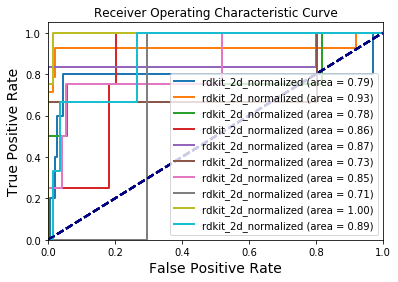

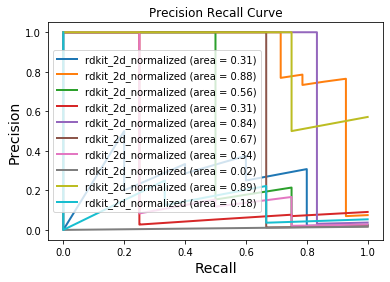

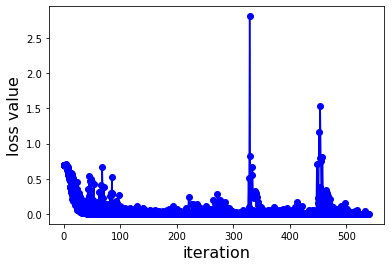

In [22]:
roc_ = []
prc_ = []
scores_ = []
labels_ = []
outputs = []
drug_encoding = 'rdkit_2d_normalized'

for i in range(10):
    roc, prc, scores, labels, test_, model = eval('run_' + drug_encoding + '(i, True)')
    roc_.append(roc)
    prc_.append(prc)
    scores_.append(scores)
    labels_.append(labels)
    outputs.append(test_)
print('ROC-Mean {:.4f}'.format(np.mean(np.array(roc_))))
print('ROC-STD {:.4f}'.format(np.std(np.array(roc_))))
print('PRC-Mean {:.4f}'.format(np.mean(np.array(prc_))))
print('PRC-STD {:.4f}'.format(np.std(np.array(prc_))))

with open('./scores_aicures/' + drug_encoding + '_score.pkl', 'wb') as f:
    pickle.dump(scores_, f, pickle.HIGHEST_PROTOCOL)


In [26]:
outputs = np.mean(np.array([np.array(i) for i in outputs]), axis = 0)

In [27]:
test_output = pd.read_csv('./aicures_data/test.csv')
test_output.activity = outputs 

In [28]:
test_output.to_csv('./aicures_data/test_pred.csv')

In [96]:
model.save_model('./model')

In [ ]:
# Repurposing

In [2]:
from DeepPurpose import property_pred

In [3]:
model = property_pred.model_pretrained('./model')

In [4]:
drug_smiles, drug_names, cid = load_antiviral_drugs()

In [6]:
pred = property_pred.repurpose(drug_smiles, model, drug_names)

repurposing...
Drug Property Prediction Mode...
in total: 82 drugs
encoding drug...
unique drugs: 81
drug encoding finished...
Done.
predicting...
---------------
Drug Repurposing Result
+------+----------------------+-------------+-------------+
| Rank |      Drug Name       | Interaction | Probability |
+------+----------------------+-------------+-------------+
|  1   |     Elvitegravir     |     YES     |     0.92    |
|  2   |      Letermovir      |      NO     |     0.44    |
|  3   |     Bictegravir      |      NO     |     0.39    |
|  4   |     Dolutegravir     |      NO     |     0.26    |
|  5   |     Ibacitabine      |      NO     |     0.13    |
|  6   |      Cidofovir       |      NO     |     0.00    |
|  7   |    Emtricitabine     |      NO     |     0.00    |
|  8   |      Zanamivir       |      NO     |     0.00    |
|  9   |      Docosanol       |      NO     |     0.00    |
|  10  |      Vidarabine      |      NO     |     0.00    |
checkout ./result/repurposing.txt